**Student ID**: 208040148

# STATISTICAL METHODS IN EXPERIMENTAL PHYSICS 
PPQ Extra

Creating 100 points with polynomial function x + x^2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Creating 100 points with polynomial function x + x^2
numVar = 100
x = np.arange(1,numVar+1)
y = x + x*x
ery = np.full((numVar), 1)
erx = np.full((numVar), 0)

Plotting it

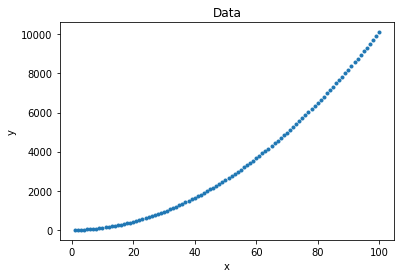

In [2]:
# Plot data

plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'.')
plt.show()

Create a generic linear function for use in fit

In [3]:
def ff(x,a,b):
    
    return a*x+b

In [4]:
def ff2(x,a,b,c):
    
    return a*x*x + b*x +c

Try to fit

In [5]:
from scipy.optimize import curve_fit
import numpy as np

p0 = 1,100
p02= 1,10,100


best_vals, covar=curve_fit(ff,x, y,p0,sigma=ery) 
best_vals2, covar2 = curve_fit(ff2,x,y,p02,sigma=ery)

print("Best values for the linear fit are ",best_vals)
print(covar)

print("Best values for the 2nd order poly fit are ",best_vals2)
print(covar2)

Best values for the linear fit are  [  102. -1717.]
[[ 6.80000e+00 -3.43400e+02]
 [-3.43400e+02  2.30078e+04]]
Best values for the 2nd order poly fit are  [ 1.00000000e+00  1.00000000e+00 -2.18193993e-10]
[[ 4.15896271e-29 -3.13863030e-27  3.86064553e-30]
 [-3.13863030e-27  2.52392409e-25 -3.14447668e-28]
 [ 3.86064553e-30 -3.14447668e-28  2.32833596e-29]]


Plot fit

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

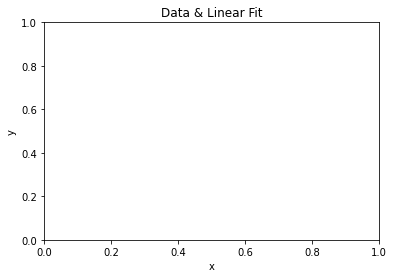

In [32]:
plt.title('Data & Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, ff(x,best_vals[0],best_vals[1]), '-', color='red',label="Fit 1st order")
plt.plot(x, ff2(x,best_vals2[0],best_vals2[1],best_vals2[2]), '-', color='blue',label="Fit 2nd order")
plt.errorbar(x, y, ery, erx, '.', color='green',label="Data")
plt.legend()
plt.show()

Calculate and plot residuals

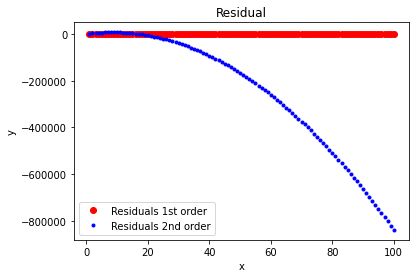

In [11]:
res=(y-ff(x,best_vals[0],best_vals[1]))/ery
res2=(y-ff2(x,best_vals[0],best_vals[1],best_vals2[2]))/ery
plt.title('Residual')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, res, 'o', color='red',label="Residuals 1st order fit")
plt.plot(x, res2, '.', color='blue',label="Residuals 2nd order fit")
plt.legend()
plt.show()

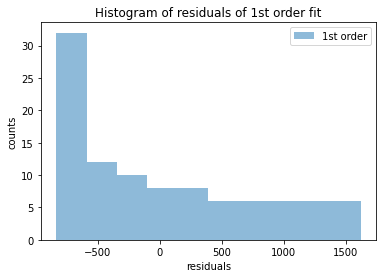

Mean= -7.161888788687065e-09
Variance= 555277.8


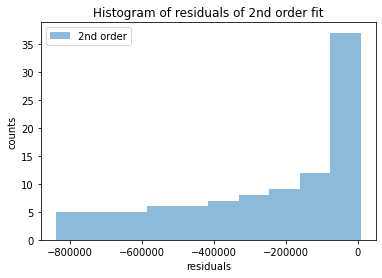

Mean 2nd order= -254974.500000545
Variance 2nd order= 65626132897.333206


In [21]:
from matplotlib import pyplot

plt.hist(res, alpha=0.5, label='1st order')
plt.xlabel("residuals")
plt.ylabel("counts")
plt.legend()
plt.title("Histogram of residuals of 1st order fit")
plt.show()


print("Mean=" ,np.mean(res))
print("Variance=" ,np.var(res))

plt.hist(res2, alpha=0.5, label='2nd order')
plt.xlabel("residuals")
plt.ylabel("counts")
plt.legend()
plt.title("Histogram of residuals of 2nd order fit")
plt.show()

print("Mean 2nd order=" ,np.mean(res2))
print("Variance 2nd order=" ,np.var(res2))

Plotting autocorrelation function

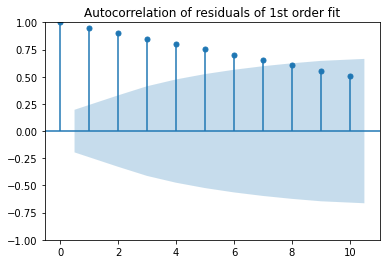

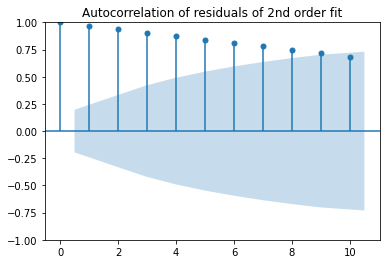

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(res,lags=10)
plt.title("Autocorrelation of residuals of 1st order fit")
plt.show()

plot_acf(res2,lags=10)
plt.title("Autocorrelation of residuals of 2nd order fit")
plt.show()

QQ Plot

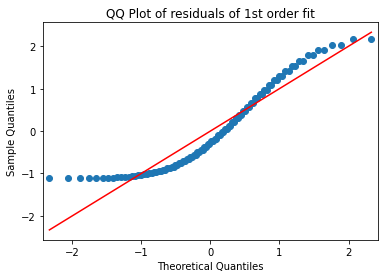

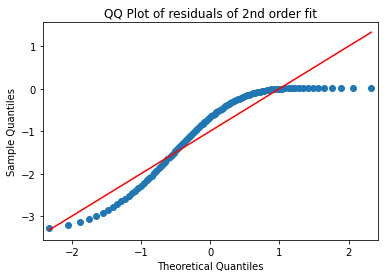

In [29]:
from statsmodels.graphics.gofplots import qqplot
##The qqplot assumes a normal distribution to compare it with. One can change the distribution using dist argument.
qqplot(res/np.sqrt(np.var(res)), line='s')
plt.title("QQ Plot of residuals of 1st order fit")
plt.show()

qqplot(res2/np.sqrt(np.var(res2)), line='s')
plt.title("QQ Plot of residuals of 2nd order fit")
plt.show()